In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [34]:
df = pd.read_csv('cleaned_forest_fires.csv') # read in the cleaned data

In [35]:
df.head() # display the first 5 rows of the data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [36]:
# Dividing into dependent and independent features
X = df.drop(['FWI', 'Classes'], axis=1)
y = df['FWI']

In [37]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0


In [38]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [39]:
# performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [40]:
X_train.shape, X_test.shape # display the shape of the train and test data

((182, 10), (61, 10))

In [41]:
X_train.corr # feature selection based on correlation

<bound method DataFrame.corr of      Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI  region
97            29  74  19   0.1  75.8   3.6  32.2   2.1   5.6       0
141           31  72  14   0.2  60.2   3.8   8.0   0.8   3.7       1
192           40  31  15   0.0  94.2  22.5  46.3  16.6  22.4       1
68            32  60  18   0.3  77.1  11.3  47.0   2.2  14.1       0
119           32  47  14   0.7  77.5   7.1   8.8   1.8   6.8       0
..           ...  ..  ..   ...   ...   ...   ...   ...   ...     ...
106           24  82  15   0.4  44.9   0.9   7.3   0.2   1.4       0
14            28  80  17   3.1  49.4   3.0   7.4   0.4   3.0       0
92            25  76  17   7.2  46.0   1.3   7.5   0.2   1.8       0
179           34  59  16   0.0  88.1  19.5  47.2   7.4  19.5       1
102           30  77  21   1.8  58.5   1.9   8.4   1.1   2.4       0

[182 rows x 10 columns]>

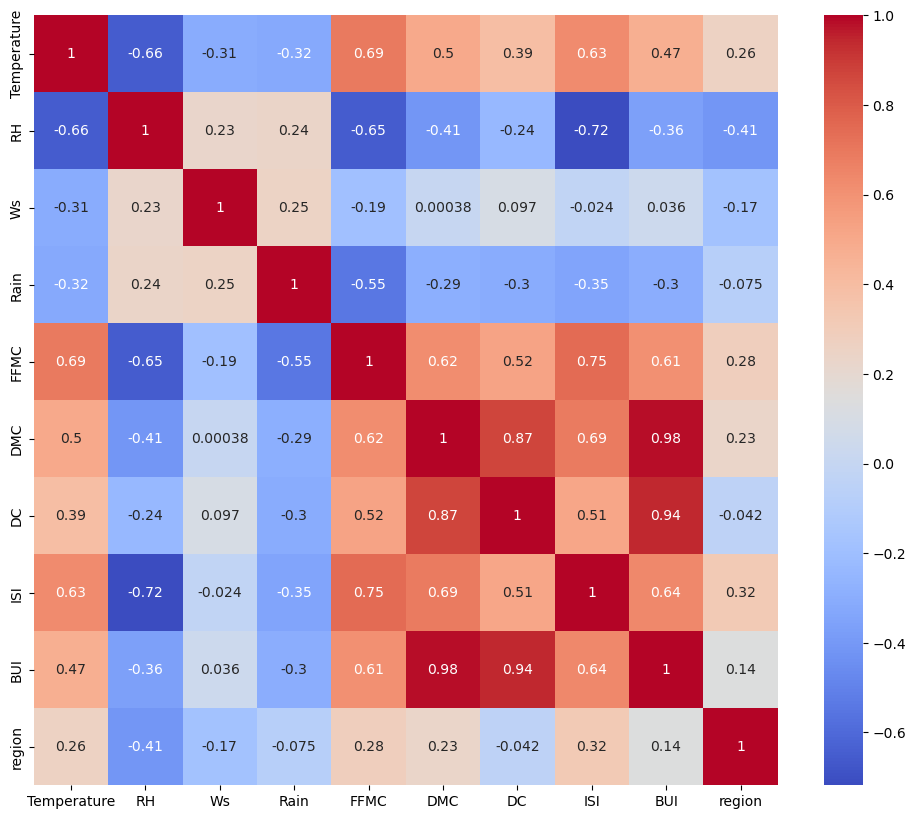

In [42]:
# Check for multicollinearity
corr = X_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [43]:
# Function to remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr() # correlation matrix of the dataset
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname) # adding the column name to the set
    return col_corr # return the set of correlated columns

In [44]:
# threshold value provided by domain expert or can be tuned using grid search
corr_features = correlation(X_train, 0.85)

In [45]:
corr_features

{'BUI', 'DC'}

In [46]:
# drop the correlated features when the threshold is greater than 0.85
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 8), (61, 8))

In [47]:
# Feature scaling or standardization using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

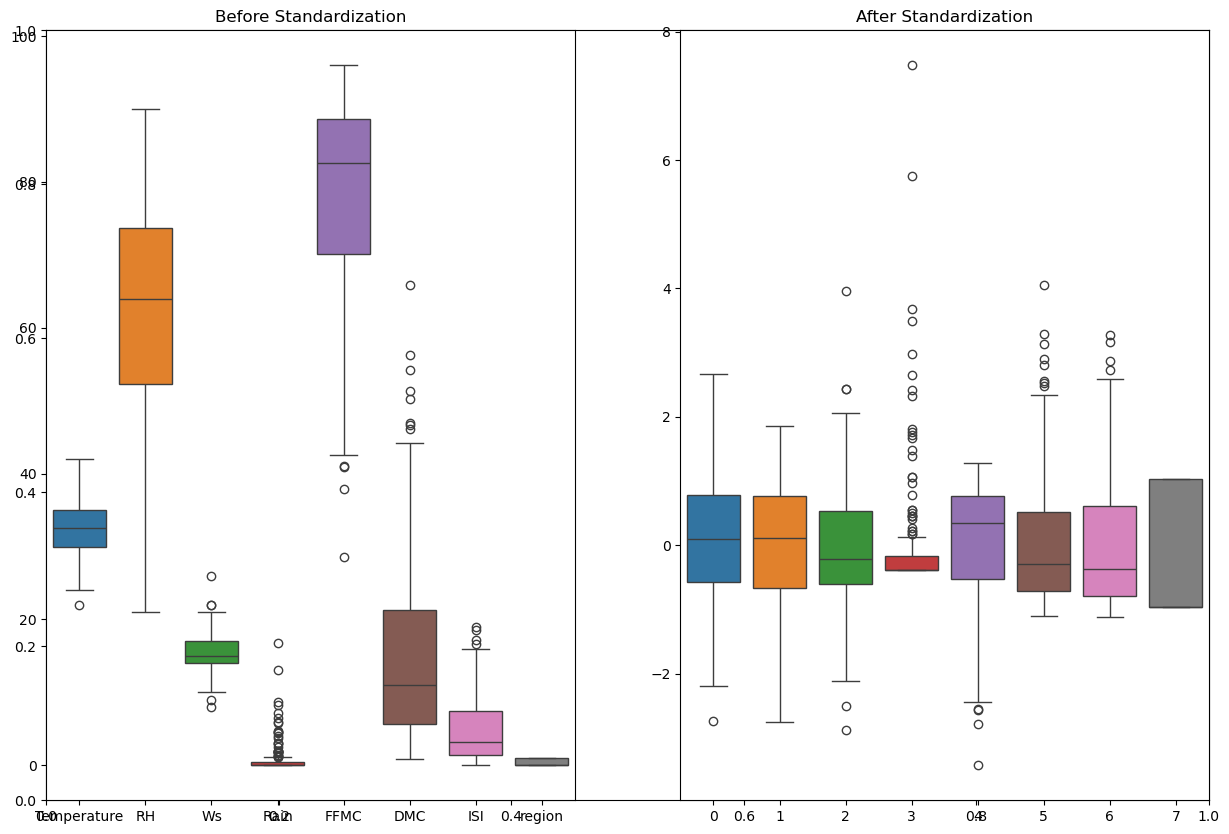

In [49]:
# box plots to understand the effects of standard scaler
plt.subplots(figsize=(15, 10))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('Before Standardization')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('After Standardization')
plt.show()

Accuracy: 98.3%
Mean Squared Error: 0.7507462368597566
R2 Score: 0.9830380246543144


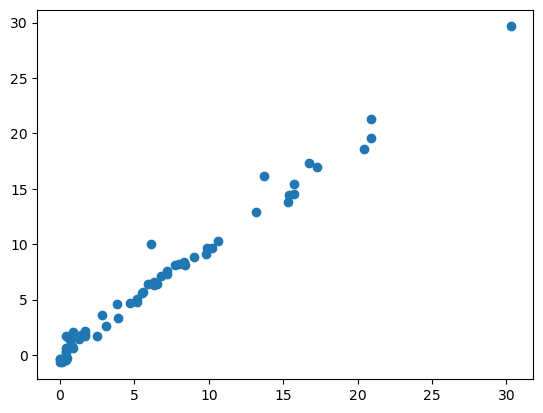

In [54]:
# Applying the Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# instantiate the model
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)
y_pred = regressor.predict(X_test_scaled)
mae = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy_pct = r2 * 100
print(f'Accuracy: {accuracy_pct:.1f}%')
print(f'Mean Squared Error: {mae}')
print(f'R2 Score: {r2}')
plt.scatter(y_test, y_pred)

Accuracy: 94.9%
Mean Squared Error: 2.248345891897475
R2 Score: 0.9492020263112388


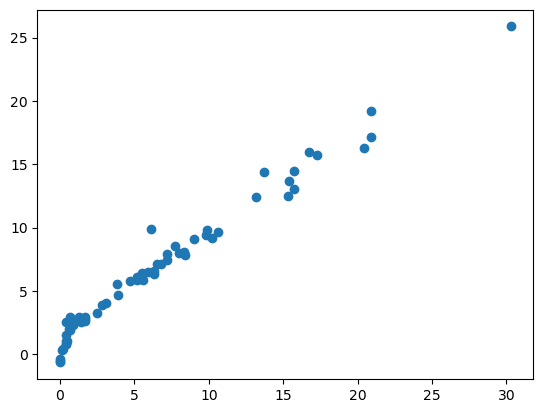

In [55]:
# Applying Lasso Regression model
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy_pct = r2 * 100
print(f'Accuracy: {accuracy_pct:.1f}%')
print(f'Mean Squared Error: {mae}')
print(f'R2 Score: {r2}')
plt.scatter(y_test, y_pred)

Accuracy: 98.2%
Mean Squared Error: 0.774594583257069
R2 Score: 0.9824992073499234


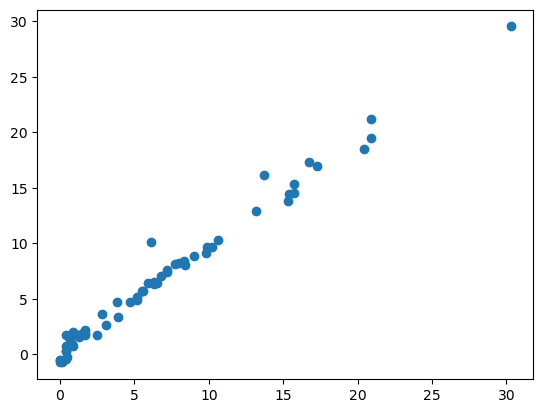

In [56]:
# applying ridge regression model
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy_pct = r2 * 100
print(f'Accuracy: {accuracy_pct:.1f}%')
print(f'Mean Squared Error: {mae}')
print(f'R2 Score: {r2}')
plt.scatter(y_test, y_pred)

Accuracy: 98.2%
Mean Squared Error: 0.7745945832575123
R2 Score: 0.9824992073499133


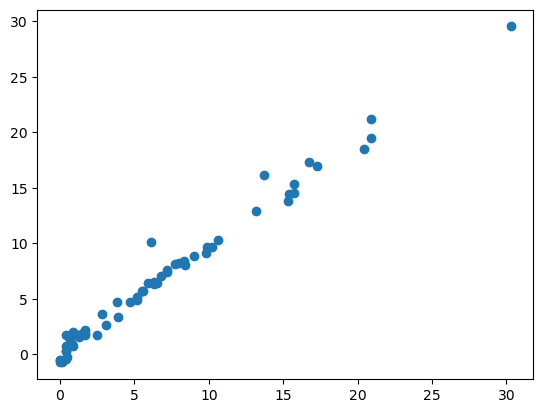

In [59]:
# applying RidgeCV model
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV()
ridge_cv.fit(X_train_scaled, y_train)
y_pred = ridge_cv.predict(X_test_scaled)
mae = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy_pct = r2 * 100
print(f'Accuracy: {accuracy_pct:.1f}%')
print(f'Mean Squared Error: {mae}')
print(f'R2 Score: {r2}')
plt.scatter(y_test, y_pred)

Accuracy: 98.1%
Mean Squared Error: 0.8303431912255987
R2 Score: 0.9812396519003032


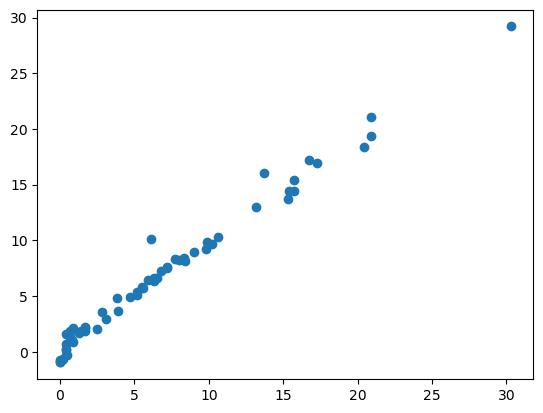

In [58]:
# applying LassoCV
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV()
lasso_cv.fit(X_train_scaled, y_train)
y_pred = lasso_cv.predict(X_test_scaled)
mae = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy_pct = r2 * 100
print(f'Accuracy: {accuracy_pct:.1f}%')
print(f'Mean Squared Error: {mae}')
print(f'R2 Score: {r2}')
plt.scatter(y_test, y_pred)

Accuracy: 86.9%
Mean Squared Error: 5.812975957233065
R2 Score: 0.868664603256521


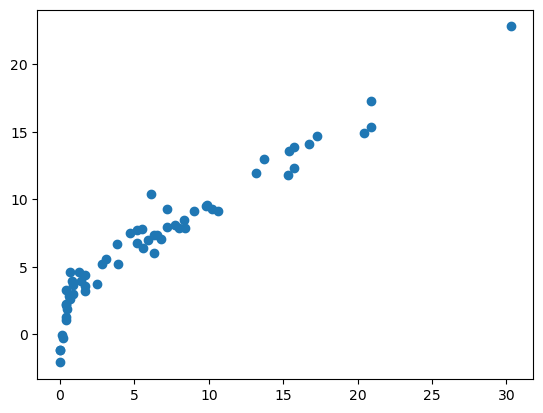

In [57]:
# applying ElasticNet regression model
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy_pct = r2 * 100
print(f'Accuracy: {accuracy_pct:.1f}%')
print(f'Mean Squared Error: {mae}')
print(f'R2 Score: {r2}')
plt.scatter(y_test, y_pred)

In [61]:
lasso_cv.coef_, ridge_cv.coef_, elastic.coef_

(array([-0.        , -0.        ,  0.        ,  0.        , -0.32374079,
         3.62576636,  4.86970037, -0.33808659]),
 array([-4.26962611e-02, -8.41168838e-02,  1.37173677e-02, -5.36731652e-04,
        -4.92940595e-01,  3.70789128e+00,  4.95579415e+00, -4.08973138e-01]),
 array([ 0.28028068, -0.44671507,  0.        , -0.        ,  0.64098374,
         2.49875942,  2.57786911,  0.        ]))

In [63]:
lasso_cv.alpha_, ridge_cv.alpha_

(0.053395191056015395, 1.0)

In [66]:
lasso_cv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

In [70]:
# Pickle the machine learning models, preprocessing model standardscaler
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(regressor, open('regressor.pkl', 'wb'))